In [1]:
import ast
import time
import pandas as pd
from selenium import webdriver
import matplotlib.pyplot as plt
from selenium.webdriver.common.by import By
from urllib.parse import urlparse, parse_qs
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException

# Champions et leurs caractéristiques

In [2]:
service = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()

# Utiliser un gestionnaire de contexte pour gérer le webdriver
with webdriver.Chrome(service=service, options=options) as driver:
    url = "https://www.op.gg/statistics/champions?region=euw&tier=all"

    driver.get(url)

    try:
        # Attendre que la table soit complètement chargée
        WebDriverWait(driver, 90).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "table[class*='css-']"))
        )
        rows = driver.find_elements(By.CSS_SELECTOR, "table[class*='css-'] tbody tr")
        liste = []

        for row in rows:
            cells = row.find_elements(By.TAG_NAME, "td")
            if len(cells) > 0:
                cell_data = [cell.text for cell in cells]
                liste.append(cell_data)
                print(cell_data)

    except Exception as e:
        print(f"Une erreur est survenue : {e}")

# Afficher les données récupérées hors du bloc with pour éviter les interactions avec le webdriver fermé
for data in liste:
    print(data)


['Ranked Solo\nRanked Flex\nARAM\nURF']
['Tous\nIron\nBronze\nSilver\nGold\nPlatinum\nEmerald\nDiamond\nMaster\nGrandmaster\nChallenger']
['Global\nNA\nEUW\nEUNE\nOCE\nKR\nJP\nBR\nLAS\nLAN\nRU\nTR\nSG\nPH\nTW\nVN\nTH']
["Sur le dernier mois\nLes 7 derniers jours\nAujourd'hui"]
['Tous\nHaut\nJungle\nMilieu\nBas\nSupport']
['1', 'Jinx', '1\u202f324\u202f081', '2.31:1', '51.59%', '26.3%', '17.31%', '199.08', '12,610']
['2', 'Lux', '957\u202f703', '2.58:1', '50.07%', '19.02%', '12.81%', '100.36', '10,589']
['3', 'Yone', '779\u202f006', '1.7:1', '49.05%', '15.47%', '17.93%', '197.19', '12,588']
['4', 'Ahri', '774\u202f325', '2.59:1', '51.27%', '15.38%', '15.89%', '183.3', '11,793']
['5', "Kai'Sa", '755\u202f577', '2.32:1', '47.65%', '15.01%', '2.85%', '199.56', '13,142']
['6', 'Diana', '753\u202f332', '2.15:1', '51.43%', '14.96%', '7.58%', '191.66', '12,909']
['7', 'Caitlyn', '748\u202f318', '2.16:1', '49.17%', '14.87%', '11.56%', '191.21', '12,565']
['8', 'Ashe', '734\u202f142', '2.28:1', 

In [27]:
champions = pd.Series(liste)
champions = pd.DataFrame(champions)
champions = pd.DataFrame(champions[0].to_list())
champions.dropna(inplace=True)
champions.rename(columns={1:"Champion",2:"Parties jouées",3:"KDA",4:"Ratio de victoire",5:"Taux de pick par match",6:"Ratio de ban par match",7:"CS",8:"Or"},inplace=True)
champions.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/champions.csv")

# Master

In [27]:
service = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()

# Utiliser un gestionnaire de contexte pour gérer le webdriver
with webdriver.Chrome(service=service, options=options) as driver:
    url = "https://www.op.gg/statistics/champions?region=euw&tier=master"

    driver.get(url)

    try:
        # Attendre que la table soit complètement chargée
        WebDriverWait(driver, 90).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "table[class*='css-']"))
        )
        rows = driver.find_elements(By.CSS_SELECTOR, "table[class*='css-'] tbody tr")
        liste = []

        for row in rows:
            cells = row.find_elements(By.TAG_NAME, "td")
            if len(cells) > 0:
                cell_data = [cell.text for cell in cells]
                liste.append(cell_data)
                print(cell_data)

    except Exception as e:
        print(f"Une erreur est survenue : {e}")

# Afficher les données récupérées hors du bloc with pour éviter les interactions avec le webdriver fermé
for data in liste:
    print(data)

['Ranked Solo\nRanked Flex\nARAM\nURF']
['Tous\nIron\nBronze\nSilver\nGold\nPlatinum\nEmerald\nDiamond\nMaster\nGrandmaster\nChallenger']
['Global\nNA\nEUW\nEUNE\nOCE\nKR\nJP\nBR\nLAS\nLAN\nRU\nTR\nSG\nPH\nTW\nVN\nTH']
["Sur le dernier mois\nLes 7 derniers jours\nAujourd'hui"]
['Tous\nHaut\nJungle\nMilieu\nBas\nSupport']
['1', 'Jinx', '40\u202f254', '2.46:1', '51.79%', '31.58%', '31.16%', '203.47', '11,994']
['2', "Kai'Sa", '26\u202f951', '2.54:1', '47.98%', '21.14%', '3.08%', '200.6', '12,424']
['3', 'Zeri', '24\u202f914', '2.51:1', '49.22%', '19.54%', '21.65%', '221.08', '12,732']
['4', 'Janna', '22\u202f696', '3.51:1', '53.34%', '17.8%', '32.05%', '24.54', '7,856']
['5', 'Viego', '22\u202f209', '2.61:1', '50.35%', '17.42%', '5.71%', '169.93', '11,487']
['6', 'Ahri', '21\u202f975', '2.95:1', '51.93%', '17.24%', '23.25%', '193.78', '11,308']
['7', 'Twitch', '21\u202f598', '2.49:1', '52.49%', '16.94%', '20.3%', '175.13', '11,914']
['8', 'Taliyah', '19\u202f779', '2.51:1', '51.86%', '15

In [28]:
champions_master = pd.Series(liste)
champions_master = pd.DataFrame(champions_master)
champions_master = pd.DataFrame(champions_master[0].to_list())
champions_master.dropna(inplace=True)
champions_master.rename(columns={1:"Champion",2:"Parties jouées",3:"KDA",4:"Ratio de victoire",5:"Taux de pick par match",6:"Ratio de ban par match",7:"CS",8:"Or"},inplace=True)
champions_master.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/champions_master.csv")
champions_master

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or
5,1,Jinx,40 254,2.46:1,51.79%,31.58%,31.16%,203.47,"11,994"
6,2,Kai'Sa,26 951,2.54:1,47.98%,21.14%,3.08%,200.6,"12,424"
7,3,Zeri,24 914,2.51:1,49.22%,19.54%,21.65%,221.08,"12,732"
8,4,Janna,22 696,3.51:1,53.34%,17.8%,32.05%,24.54,"7,856"
9,5,Viego,22 209,2.61:1,50.35%,17.42%,5.71%,169.93,"11,487"
...,...,...,...,...,...,...,...,...,...
167,163,Morgana,1 584,2.61:1,47.92%,1.24%,1.3%,71.05,"8,822"
168,164,Amumu,1 476,2.23:1,47.02%,1.16%,0.33%,122.47,"9,575"
169,165,Malzahar,1 344,2.18:1,48.07%,1.05%,0.24%,202.49,"11,106"
170,166,Naafiri,1 296,2.03:1,47.45%,1.02%,0.23%,186.57,"12,102"


# Grandmaster

In [29]:
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
url = "https://www.op.gg/statistics/champions?region=euw&tier=grandmaster"

liste = list()
try:
    driver.get(url)
    
    # Attendre que la table soit complètement chargée
    WebDriverWait(driver, 70).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, "table[class*='css-']"))
    )
    rows = driver.find_elements(By.CSS_SELECTOR, "table[class*='css-'] tbody tr")
    
    for row in rows:
        cells = row.find_elements(By.TAG_NAME, "td")
        if len(cells) > 0:
            cell_data = [cell.text for cell in cells]
            print(cell_data)
            liste.append(cell_data)

except Exception as e:
    print(f"Une erreur est survenue : {e}")
finally:
    driver.quit()

# Afficher les données récupérées
for data in liste:
    print(data)

['Ranked Solo\nRanked Flex\nARAM\nURF']
['Tous\nIron\nBronze\nSilver\nGold\nPlatinum\nEmerald\nDiamond\nMaster\nGrandmaster\nChallenger']
['Global\nNA\nEUW\nEUNE\nOCE\nKR\nJP\nBR\nLAS\nLAN\nRU\nTR\nSG\nPH\nTW\nVN\nTH']
["Sur le dernier mois\nLes 7 derniers jours\nAujourd'hui"]
['Tous\nHaut\nJungle\nMilieu\nBas\nSupport']
['1', 'Jinx', '2\u202f634', '2.61:1', '51.97%', '34.79%', '34.45%', '209.61', '11,999']
['2', 'Viego', '2\u202f092', '2.81:1', '49.9%', '27.63%', '6.15%', '167.02', '11,356']
['3', 'Zeri', '1\u202f908', '2.56:1', '49.16%', '25.2%', '26.24%', '224.72', '12,667']
['4', 'Taliyah', '1\u202f905', '2.72:1', '51.13%', '25.16%', '27.57%', '194.45', '11,746']
['5', 'Nautilus', '1\u202f698', '2.29:1', '46.23%', '22.43%', '11.73%', '27.39', '7,194']
['6', 'Ahri', '1\u202f526', '3.04:1', '51.38%', '20.16%', '21.03%', '196.99', '11,179']
['7', "Kai'Sa", '1\u202f466', '2.52:1', '45.57%', '19.36%', '2.68%', '204.49', '12,342']
['8', 'Lee Sin', '1\u202f288', '3.02:1', '49.77%', '17.01

In [30]:
champions_grmaster = pd.Series(liste)
champions_grmaster = pd.DataFrame(champions_grmaster)
champions_grmaster = pd.DataFrame(champions_grmaster[0].to_list())
champions_grmaster.dropna(inplace=True)
champions_grmaster.rename(columns={1:"Champion",2:"Parties jouées",3:"KDA",4:"Ratio de victoire",5:"Taux de pick par match",6:"Ratio de ban par match",7:"CS",8:"Or"},inplace=True)
champions_grmaster.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/champions_grmaster.csv")
champions_grmaster

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or
5,1,Jinx,2 634,2.61:1,51.97%,34.79%,34.45%,209.61,"11,999"
6,2,Viego,2 092,2.81:1,49.9%,27.63%,6.15%,167.02,"11,356"
7,3,Zeri,1 908,2.56:1,49.16%,25.2%,26.24%,224.72,"12,667"
8,4,Taliyah,1 905,2.72:1,51.13%,25.16%,27.57%,194.45,"11,746"
9,5,Nautilus,1 698,2.29:1,46.23%,22.43%,11.73%,27.39,"7,194"
...,...,...,...,...,...,...,...,...,...
167,163,Amumu,19,1.9:1,31.58%,0.26%,0.85%,68.63,"7,888"
168,164,Fizz,17,1.82:1,29.41%,0.26%,1.42%,189.94,"12,344"
169,165,Briar,16,2.2:1,50%,0.21%,1.71%,146.94,"10,882"
170,166,Malzahar,12,2.31:1,50%,0.34%,0.15%,196.67,"10,607"


# Challenger

In [31]:
service = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()

# Utiliser un gestionnaire de contexte pour gérer le webdriver
with webdriver.Chrome(service=service, options=options) as driver:
    url = "https://www.op.gg/statistics/champions?region=euw&tier=challenger"

    driver.get(url)

    try:
        # Attendre que la table soit complètement chargée
        WebDriverWait(driver, 90).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, "table[class*='css-']"))
        )
        rows = driver.find_elements(By.CSS_SELECTOR, "table[class*='css-'] tbody tr")
        liste = []

        for row in rows:
            cells = row.find_elements(By.TAG_NAME, "td")
            if len(cells) > 0:
                cell_data = [cell.text for cell in cells]
                liste.append(cell_data)
                print(cell_data)

    except Exception as e:
        print(f"Une erreur est survenue : {e}")

# Afficher les données récupérées hors du bloc with pour éviter les interactions avec le webdriver fermé
for data in liste:
    print(data)

['Ranked Solo\nRanked Flex\nARAM\nURF']
['Tous\nIron\nBronze\nSilver\nGold\nPlatinum\nEmerald\nDiamond\nMaster\nGrandmaster\nChallenger']
['Global\nNA\nEUW\nEUNE\nOCE\nKR\nJP\nBR\nLAS\nLAN\nRU\nTR\nSG\nPH\nTW\nVN\nTH']
["Sur le dernier mois\nLes 7 derniers jours\nAujourd'hui"]
['Tous\nHaut\nJungle\nMilieu\nBas\nSupport']
['1', 'Jinx', '1\u202f031', '2.94:1', '55%', '39.21%', '34.29%', '221.73', '12,673']
['2', 'Viego', '1\u202f029', '2.99:1', '50.73%', '39.14%', '6.87%', '171.65', '11,576']
['3', 'Taliyah', '894', '2.85:1', '53.69%', '34%', '35.56%', '200.7', '11,902']
['4', 'Zeri', '833', '2.89:1', '51.38%', '31.68%', '26.46%', '235.44', '13,172']
['5', 'Ahri', '714', '3.3:1', '54.76%', '27.16%', '22.3%', '204.14', '11,610']
['6', 'Lee Sin', '607', '3.23:1', '51.24%', '23.09%', '7.25%', '152.27', '11,128']
['7', 'Nautilus', '561', '2.38:1', '47.95%', '21.34%', '10.48%', '27.76', '7,449']
['8', 'Jax', '555', '2.33:1', '52.61%', '21.11%', '17.94%', '171.43', '11,021']
['9', 'Tristana', 

In [32]:
champions_challenger = pd.Series(liste)
champions_challenger = pd.DataFrame(champions_challenger)
champions_challenger = pd.DataFrame(champions_challenger[0].to_list())
champions_challenger.dropna(inplace=True)
champions_challenger.rename(columns={1:"Champion",2:"Parties jouées",3:"KDA",4:"Ratio de victoire",5:"Taux de pick par match",6:"Ratio de ban par match",7:"CS",8:"Or"},inplace=True)
champions_challenger.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/champions_challenger.csv")
champions_challenger

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or
5,1,Jinx,1 031,2.94:1,55%,39.21%,34.29%,221.73,"12,673"
6,2,Viego,1 029,2.99:1,50.73%,39.14%,6.87%,171.65,"11,576"
7,3,Taliyah,894,2.85:1,53.69%,34%,35.56%,200.7,"11,902"
8,4,Zeri,833,2.89:1,51.38%,31.68%,26.46%,235.44,"13,172"
9,5,Ahri,714,3.3:1,54.76%,27.16%,22.3%,204.14,"11,610"
...,...,...,...,...,...,...,...,...,...
167,163,Fizz,1,3.75:1,100%,0.05%,1.04%,175,"12,864"
168,164,Warwick,1,0.29:1,0%,0.05%,0.76%,157,"7,966"
169,165,Briar,1,1.78:1,0%,0.04%,6.44%,164,"11,535"
170,166,Singed,0,0:1,0%,0%,0.55%,NaN,NaN


<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Description des Colonnes</title>
</head>
<body>
    <h1>Description des Colonnes</h1>
    <ul>
        <li><strong>Champion:</strong> Nom du champion utilisé dans le jeu.</li>
        <li><strong>Parties jouées:</strong> Nombre total de parties jouées avec ce champion.</li>
        <li><strong>KDA:</strong> Ratio "Kills/Deaths/Assists" qui mesure la performance du joueur avec le champion.</li>
        <li><strong>Ratio de victoire:</strong> Pourcentage de parties gagnées avec ce champion.</li>
        <li><strong>Taux de pick par match:</strong> Fréquence à laquelle le champion est choisi dans les parties.</li>
        <li><strong>Ratio de ban par match:</strong> Fréquence à laquelle le champion est banni dans les parties.</li>
        <li><strong>CS:</strong> Nombre moyen de "creep score" (unités tuées) par partie.</li>
        <li><strong>Or:</strong> Or moyen accumulé par partie avec ce champion.</li>
    </ul>
</body>
</html>


In [243]:
champions

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or
5,1,Jinx,5 497 675,2.37:1,51.94%,25.74%,16.21%,198.69,"11,442"
6,2,Lux,3 938 956,2.56:1,50.3%,18.45%,13.16%,93.1,"10,357"
7,3,Yone,3 816 172,1.69:1,48.99%,17.87%,18.77%,194.3,"12,357"
8,4,Caitlyn,3 501 242,2.2:1,49.43%,16.4%,11.89%,191.23,"12,435"
9,5,Kai'Sa,3 350 725,2.38:1,48.18%,15.69%,2.49%,199.12,"13,071"
...,...,...,...,...,...,...,...,...,...
167,163,Ryze,331 865,2.13:1,48.53%,1.55%,0.19%,202.7,"12,047"
168,164,Kennen,315 704,2.02:1,48.65%,1.48%,0.47%,167.22,"11,434"
169,165,Corki,304 950,2.14:1,46.32%,1.43%,0.16%,197.11,"12,767"
170,166,Taric,303 493,2.78:1,52.17%,1.42%,0.26%,40.37,"8,332"


In [3]:
#Les noms prélevés sur le site et certains dans les liens ne correspondaient pas
#Une solution était de les mettre en minuscule, de remplacer certains éléments par d'autres comme "é" par "e"
ChampionsList = list(champions["Champion"])
ChampionsList = [x.lower().replace("'", "").replace(" ", "").replace("maîtreyi", "masteryi").replace("dr.mundo", "drmundo").replace("wukong", "monkeyking").replace("nunuetwillump", "nunu").replace("renataglasc", "renata").replace("é","e") for x in ChampionsList]
ChampionsList

NameError: name 'champions' is not defined

# Données : Faible Fort

### Il nous a semblé pertinent de scrapper les données sur les champions contre lesquels un champion est plus faible ou plus fort.

In [245]:
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

df_champions = pd.DataFrame(index=ChampionsList, columns=['Faibles contre', 'Taux de victoire (faible)', 'Forts contre', 'Taux de victoire (fort)'])

wait = WebDriverWait(driver, 10)

for champion_name in ChampionsList:
    url = f"https://www.op.gg/champions/{champion_name}/build"
    driver.get(url)
    print(f"Champion analysé : {champion_name.capitalize()}")

    weak_info = []
    fort_info = []

    weak = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".css-17rk1u8.e1y283ae3")))
    for index, elem in enumerate(weak, start=1):
        weak_win_rate = wait.until(EC.visibility_of(elem.find_element(By.XPATH, f'.//ancestor::div[@id="content-container"]/aside/div[1]/div[2]/div/ul[1]/li[{index}]/a')))
        weak_champion_link = weak_win_rate.get_attribute('href')
        weak_champion_adversaire = parse_qs(urlparse(weak_champion_link).query).get('target_champion', [None])[0]
        weak_info.append((weak_champion_adversaire, weak_win_rate.text))

    fort = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".css-1syqaij.e1y283ae3")))
    for index, elem in enumerate(fort, start=1):
        fort_win_rate = wait.until(EC.visibility_of(elem.find_element(By.XPATH, f'.//ancestor::div[@id="content-container"]/aside/div[1]/div[2]/div/ul[2]/li[{index}]/a')))
        fort_champion_link = fort_win_rate.get_attribute('href')
        fort_champion_adversaire = parse_qs(urlparse(fort_champion_link).query).get('target_champion', [None])[0]
        fort_info.append((fort_champion_adversaire, fort_win_rate.text))
    
    df_champions.loc[champion_name, 'Faibles contre'] = [x[0] for x in weak_info]
    df_champions.loc[champion_name, 'Taux de victoire (faible)'] = [x[1] for x in weak_info]
    df_champions.loc[champion_name, 'Forts contre'] = [x[0] for x in fort_info]
    df_champions.loc[champion_name, 'Taux de victoire (fort)'] = [x[1] for x in fort_info]

driver.quit()

Champion analysé : Jinx
Champion analysé : Lux
Champion analysé : Yone
Champion analysé : Caitlyn


KeyboardInterrupt: 

In [66]:
df_champions.dropna()

,Faibles contre,Taux de victoire (faible),Forts contre,Taux de victoire (fort)
jinx,"[veigar, twitch, kogmaw, jhin]","[43.62%\n149\nParties, 46.97%\n2,906\nParties,...","[varus, samira, kalista, caitlyn, missfortune]","[55.88%\n1,668\nParties, 54.23%\n1,383\nPartie..."
lux,"[poppy, sona, braum, leona, brand]","[35.29%\n51\nParties, 39.9%\n208\nParties, 42....","[zac, swain, hwei, xerath, camille]","[57.78%\n45\nParties, 57.45%\n94\nParties, 55...."
yone,"[lux, brand, neeko, syndra, twistedfate]","[39.73%\n224\nParties, 41.49%\n94\nParties, 42...","[velkoz, karma, azir, corki, orianna]","[62.16%\n37\nParties, 58.16%\n98\nParties, 57...."
caitlyn,"[veigar, ziggs, twitch, jinx, xayah]","[44.83%\n58\nParties, 45.12%\n82\nParties, 45....","[senna, nilah, aphelios, kalista, smolder]","[57.5%\n80\nParties, 54.59%\n218\nParties, 53...."
kaisa,"[nilah, senna, kogmaw, ziggs, zeri]","[40.56%\n641\nParties, 41.6%\n125\nParties, 43...","[missfortune, caitlyn, aphelios, smolder, yasuo]","[51.62%\n587\nParties, 51.19%\n1,856\nParties,..."
...,...,...,...,...
monkeyking,"[evelynn, fiddlesticks, kayn, gragas, nocturne]","[40.74%\n54\nParties, 40.91%\n44\nParties, 40....","[karthus, warwick, jarvaniv, masteryi, graves]","[65.71%\n35\nParties, 63.41%\n41\nParties, 58...."
nunu,"[belveth, skarner, olaf, kindred, sylas]","[42.67%\n75\nParties, 43.01%\n93\nParties, 43....","[sejuani, warwick, xinzhao, masteryi, ivern]","[65.71%\n35\nParties, 65.22%\n46\nParties, 62...."
ksante,"[shen, rengar, reksai, singed, smolder]","[32.81%\n128\nParties, 33.33%\n33\nParties, 37...","[gnar, udyr, yasuo, jayce, chogath]","[61.48%\n122\nParties, 59.74%\n77\nParties, 58..."
zoe,"[diana, malzahar, akali, malphite, galio]","[36.92%\n65\nParties, 37.84%\n37\nParties, 40....","[ekko, azir, orianna, hwei, tristana]","[62.16%\n37\nParties, 60.34%\n58\nParties, 55...."


Une ligne correspond à un champion. Chaque colonne correspond pour l'instant aux champions contre lesquels il est plus fort/ faible avec le taux de victoire. Il est nécessaire de diviser les colonnes pour apercevoir la donnée de façon plus compréhensible.

In [73]:
transformed_data = []
for index, row in df_champions.iterrows():
    faibles_contre = row['Faibles contre'] if isinstance(row['Faibles contre'], list) else []
    taux_victoire_faible = row['Taux de victoire (faible)'] if isinstance(row['Taux de victoire (faible)'], list) else []

    forts_contre = row['Forts contre'] if isinstance(row['Forts contre'], list) else []
    taux_victoire_fort = row['Taux de victoire (fort)'] if isinstance(row['Taux de victoire (fort)'], list) else []

    for faible, taux_faible in zip(faibles_contre, taux_victoire_faible):
        transformed_data.append([index, faible, 0, taux_faible])

    for fort, taux_fort in zip(forts_contre, taux_victoire_fort):
        transformed_data.append([index, fort, 1, taux_fort])
def split_taux_et_parties(taux_parties_str):
    taux, parties, _ = taux_parties_str.split('\n')
    return taux, parties

df_transformed = pd.DataFrame(transformed_data, columns=['Champion', 'Adversaire', 'Type (0=Faible, 1=Fort)', 'Taux de victoire'])

df_transformed[['Taux de victoire', 'Parties']] = df_transformed['Taux de victoire'].apply(lambda x: pd.Series(split_taux_et_parties(x)))

df_transformed.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/FaibleFort.csv")

In [84]:
df_transformed["Parties"] = df_transformed["Parties"].apply(lambda x : x.replace(",",""))
df_transformed["Parties"] = df_transformed["Parties"].astype(int)

AttributeError: 'int' object has no attribute 'replace'

In [86]:
df_transformed

,Champion,Adversaire,"Type (0=Faible, 1=Fort)",Taux de victoire,Parties
0,jinx,veigar,0,43.62%,149
1,jinx,twitch,0,46.97%,2906
2,jinx,kogmaw,0,48.14%,1157
3,jinx,jhin,0,49.86%,3664
4,jinx,varus,1,55.88%,1668
...,...,...,...,...,...
1658,renata,braum,1,61.76%,102
1659,renata,swain,1,60%,35
1660,renata,neeko,1,59.38%,32
1661,renata,ashe,1,59.32%,59


In [85]:
df_transformed.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/FaibleFort.csv")

In [72]:
champions['Champion'] = ChampionsList
champions

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or,champion
5,1,jinx,5 291 016,2.37:1,51.96%,25.77%,16.07%,198.73,"11,405",jinx
6,2,lux,3 793 152,2.56:1,50.31%,18.48%,13.19%,93.06,"10,360",lux
7,3,yone,3 679 120,1.69:1,48.99%,17.92%,18.76%,194.27,"12,358",yone
8,4,caitlyn,3 374 666,2.2:1,49.45%,16.44%,11.91%,191.26,"12,436",caitlyn
9,5,kaisa,3 207 097,2.38:1,48.19%,15.62%,2.48%,199.08,"13,075",kaisa
...,...,...,...,...,...,...,...,...,...,...
167,163,ryze,312 114,2.12:1,48.49%,1.52%,0.19%,202.6,"12,046",ryze
168,164,kennen,304 155,2.03:1,48.66%,1.48%,0.47%,167.23,"11,439",kennen
169,165,taric,291 768,2.78:1,52.17%,1.42%,0.26%,40.38,"8,334",taric
170,166,corki,288 268,2.15:1,46.38%,1.4%,0.16%,197.06,"12,773",corki


# AFK stats pour avoir le taux de rage-quit

In [144]:
def accept_cookies_if_present_afk(driver):
    try:
        accept_cookies_button = driver.find_element(By.XPATH,"//button[contains(., 'Tout accepter')]")
        accept_cookies_button.click()
        print("Le bouton 'J'ACCEPTE' a été cliqué.")
    except NoSuchElementException:
        print("Le bouton 'J'ACCEPTE' n'est pas présent sur la page.")
    except ElementClickInterceptedException:
        wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button._ngcontent-ng-c1348393638"))).click()
        print("Le bouton 'J'ACCEPTE' était intercepté mais a été cliqué après attente.")



In [15]:
chrome_options = Options()
chrome_options.add_argument("--disable-notifications")

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)
url = 'https://www.leagueofgraphs.com/fr/stats/afk-stats/lan'
driver.get(url)

table = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CLASS_NAME, 'data_table')))

rows = table.find_elements(By.TAG_NAME,'tr')

afk_rates = {}

for row in rows[1:]:
    champion_name = row.find_element(By.CSS_SELECTOR,'.name').text
    afk_rate = float(row.find_element(By.CSS_SELECTOR,'.value').text.replace('%', '')) / 100

    afk_rates[champion_name] = afk_rate

driver.quit()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":".name"}
  (Session info: chrome=124.0.6367.62)
Stacktrace:
0   chromedriver                        0x000000010465a8dc chromedriver + 4368604
1   chromedriver                        0x0000000104652d70 chromedriver + 4337008
2   chromedriver                        0x0000000104276c04 chromedriver + 289796
3   chromedriver                        0x00000001042b8e00 chromedriver + 560640
4   chromedriver                        0x00000001042af368 chromedriver + 521064
5   chromedriver                        0x00000001042f15ec chromedriver + 792044
6   chromedriver                        0x00000001042adab4 chromedriver + 514740
7   chromedriver                        0x00000001042ae50c chromedriver + 517388
8   chromedriver                        0x000000010461edf8 chromedriver + 4124152
9   chromedriver                        0x0000000104623be8 chromedriver + 4144104
10  chromedriver                        0x00000001046047c0 chromedriver + 4016064
11  chromedriver                        0x0000000104624518 chromedriver + 4146456
12  chromedriver                        0x00000001045f6274 chromedriver + 3957364
13  chromedriver                        0x0000000104643e60 chromedriver + 4275808
14  chromedriver                        0x0000000104643fdc chromedriver + 4276188
15  chromedriver                        0x00000001046529d0 chromedriver + 4336080
16  libsystem_pthread.dylib             0x0000000194182f94 _pthread_start + 136
17  libsystem_pthread.dylib             0x000000019417dd34 thread_start + 8


# Dataset historique parties jouées

In [21]:
# Fonction pour accepter les cookies si le bouton est présent
def accept_cookies_if_present(driver):
    try:
        accept_cookies_button = driver.find_element(By.CSS_SELECTOR, "button.css-k8o10q")
        accept_cookies_button.click()
        print("Le bouton 'J'ACCEPTE' a été cliqué.")
    except NoSuchElementException:
        print("Le bouton 'J'ACCEPTE' n'est pas présent sur la page.")
    except ElementClickInterceptedException:
        wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button.css-k8o10q"))).click()
        print("Le bouton 'J'ACCEPTE' était intercepté mais a été cliqué après attente.")


def click_show_more(driver, wait):
    actions = ActionChains(driver)
    while True:
        try:
            # Recherche du bouton "Show More"
            show_more_button = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "button.more")))
            # Faire défiler la page jusqu'au bouton "Show More"
            actions.move_to_element(show_more_button).perform()
            # Cliquer sur le bouton "Show More" s'il est présent et cliquable
            if show_more_button.is_displayed() and show_more_button.is_enabled():
                driver.execute_script("arguments[0].click();", show_more_button)
            # Faire défiler la page vers le bas pour charger plus de contenu
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            # Attendre que les nouveaux éléments soient chargés et que le bouton soit à nouveau disponible
            time.sleep(2)
        except TimeoutException:
            print("Plus de bouton 'Show More' à cliquer.")
            break
        except NoSuchElementException:
            print("Bouton 'Show More' non trouvé, fin de la boucle.")
            break
        except ElementClickInterceptedException:
            print("Le bouton 'Show More' n'est pas cliquable pour le moment. Réessayer...")
            time.sleep(2)
        except Exception as e:
            print(f"Une exception inattendue est survenue: {e}")
            break

chrome_options = Options()
chrome_options.add_argument("--disable-notifications")

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

url = "https://www.op.gg/leaderboards/tier?page=4"
driver.get(url)

wait = WebDriverWait(driver, 10)
data = []
# Récupérer les liens vers les profils des joueurs
test1 = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".css-rmp2x6.euud7vz0")))

liste_noms=list()
for elem in test1:
    profile_link = elem.find_element(By.CSS_SELECTOR, "a.summoner-link").get_attribute("href")
    liste_noms.append(profile_link)

In [4]:
url
# cette ligne de code est essentiel lorsque le code pour scrapper les éléments des joueurs s'est arrêté à cause d'un problème inattendu. Cela nous permet de ne pas rescrapper depuis le début mais seulement de rescrapper les donénes à partir de cet url. 

'https://www.op.gg/leaderboards/tier'

In [11]:
#url='https://www.op.gg/summoners/euw/Raz%C3%B8rk%20Activoo-razzz'
if url in liste_noms:
    index = liste_noms.index(url)
    del liste_noms[:index]
liste_noms
#Ce code contient les url dont les informations n'ont pas encore été scrappées.

['https://www.op.gg/summoners/euw/Zielok-EUW12',
 'https://www.op.gg/summoners/euw/TIMESH-EUW',
 'https://www.op.gg/summoners/euw/Makkor-EUW',
 'https://www.op.gg/summoners/euw/Lathyrus-EUW',
 'https://www.op.gg/summoners/euw/Stu%20Ungar-euw12',
 'https://www.op.gg/summoners/euw/J3rkie-EUW',
 'https://www.op.gg/summoners/euw/M1dLaoban-RKR',
 'https://www.op.gg/summoners/euw/Coatpustmain-Coat',
 'https://www.op.gg/summoners/euw/Season%203%20Chall-EUW',
 'https://www.op.gg/summoners/euw/STN%20Blade40-000',
 'https://www.op.gg/summoners/euw/pocovirtuoso-cuore',
 'https://www.op.gg/summoners/euw/ARK%20Loouke-MID',
 'https://www.op.gg/summoners/euw/Xaro-1337',
 'https://www.op.gg/summoners/euw/lpl%20dna-12103',
 'https://www.op.gg/summoners/euw/faker%20baIIsack-0000',
 'https://www.op.gg/summoners/euw/KEM%20fantomisto-euw11',
 'https://www.op.gg/summoners/euw/Shouy%CE%BFu%20Hinata-EUW',
 'https://www.op.gg/summoners/euw/Petu-EUW',
 'https://www.op.gg/summoners/euw/raining-pr%C5%A1%C3%AD',
 

In [22]:
driver = webdriver.Chrome(service=service, options=chrome_options)
wait = WebDriverWait(driver, 10)
data = []
# Scrapping des données des parties passées.
for url in liste_noms:
    driver.get(url)
    accept_cookies_if_present(driver)
    click_show_more(driver, wait)
    wait_parties = WebDriverWait(driver, 10)
    while True:
        try:
            show_more_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button.more")))
            show_more_button.click()
            wait.until(EC.invisibility_of_element(show_more_button))
            wait_parties = WebDriverWait(driver, 3)
        except Exception as e:
            print("Le bouton 'Show More' n'est plus présent ou une autre exception s'est produite:", e)
        break
        
    parties = wait_parties.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".css-j7qwjs.e1155w840")))

    for index, partie in enumerate(parties, start=1):
        
        partie_data = {
            'Résultat': partie.find_element(By.CSS_SELECTOR, ".result").text,
            'Durée': partie.find_element(By.CSS_SELECTOR, ".length").text,
            'Champion': partie.find_element(By.CSS_SELECTOR, "a.champion img").get_attribute("alt"),
            'Contribution': partie.find_element(By.CSS_SELECTOR, ".p-kill").text,
            'Rang': partie.find_element(By.CSS_SELECTOR, ".avg-tier").text,
            'KDA' : partie.find_element(By.CSS_SELECTOR, ".kda").text,
            'KDA ratio' : partie.find_element(By.CSS_SELECTOR, ".kda-ratio").text,
            'Type de jeu': partie.find_element(By.CSS_SELECTOR, ".game-type").text,
            'Tags': [tag_element.text for tag_element in partie.find_elements(By.CSS_SELECTOR, ".game-tags__scroll-container div.tag")],
            'Items alt text': [img.get_attribute("alt") for img in partie.find_elements(By.CSS_SELECTOR, "dl.items > dd div.item img")],
            'Noms héros': [img.get_attribute("alt") for img in partie.find_elements(By.CSS_SELECTOR, "div.icon img")]

        }
        
        data.append(partie_data)
        print("Données de la partie", index, "collectées.")
driver.quit()

Le bouton 'J'ACCEPTE' n'est pas présent sur la page.
Plus de bouton 'Show More' à cliquer.
Le bouton 'Show More' n'est plus présent ou une autre exception s'est produite: Message: 
Stacktrace:
0   chromedriver                        0x0000000100d228dc chromedriver + 4368604
1   chromedriver                        0x0000000100d1ad70 chromedriver + 4337008
2   chromedriver                        0x000000010093ec04 chromedriver + 289796
3   chromedriver                        0x0000000100980e00 chromedriver + 560640
4   chromedriver                        0x00000001009b95ec chromedriver + 792044
5   chromedriver                        0x0000000100975ab4 chromedriver + 514740
6   chromedriver                        0x000000010097650c chromedriver + 517388
7   chromedriver                        0x0000000100ce6df8 chromedriver + 4124152
8   chromedriver                        0x0000000100cebbe8 chromedriver + 4144104
9   chromedriver                        0x0000000100ccc7c0 chromedriver + 

WebDriverException: Message: disconnected: not connected to DevTools
  (failed to check if window was closed: disconnected: not connected to DevTools)
  (Session info: chrome=124.0.6367.79)
Stacktrace:
0   chromedriver                        0x0000000100d228dc chromedriver + 4368604
1   chromedriver                        0x0000000100d1ad70 chromedriver + 4337008
2   chromedriver                        0x000000010093ec04 chromedriver + 289796
3   chromedriver                        0x0000000100927d00 chromedriver + 195840
4   chromedriver                        0x0000000100927c3c chromedriver + 195644
5   chromedriver                        0x00000001009b8d24 chromedriver + 789796
6   chromedriver                        0x0000000100975ab4 chromedriver + 514740
7   chromedriver                        0x000000010097650c chromedriver + 517388
8   chromedriver                        0x0000000100ce6df8 chromedriver + 4124152
9   chromedriver                        0x0000000100cebbe8 chromedriver + 4144104
10  chromedriver                        0x0000000100ccc7c0 chromedriver + 4016064
11  chromedriver                        0x0000000100cec518 chromedriver + 4146456
12  chromedriver                        0x0000000100cbe274 chromedriver + 3957364
13  chromedriver                        0x0000000100d0be60 chromedriver + 4275808
14  chromedriver                        0x0000000100d0bfdc chromedriver + 4276188
15  chromedriver                        0x0000000100d1a9d0 chromedriver + 4336080
16  libsystem_pthread.dylib             0x0000000194182f94 _pthread_start + 136
17  libsystem_pthread.dylib             0x000000019417dd34 thread_start + 8


In [23]:
df=pd.DataFrame(data)
df

,Résultat,Durée,Champion,Contribution,Rang,KDA,KDA ratio,Type de jeu,Tags,Items alt text,Noms héros
0,Victoire,33:19,Olaf,C/Tués 53%,Master,14 / 4 / 7,5.25:1 KDA,Match classé Solo,[Double Kill],"[Marque du bourreau, Estropieur, Gage de Stera...","[Camille, Kha'Zix, Cassiopeia, Ezreal, Sona, O..."
1,Victoire,46:31,Olaf,C/Tués 57%,Master,6 / 3 / 14,6.67:1 KDA,Match classé Solo,[],"[Manteau de Négatron, Estropieur, Présage de R...","[Olaf, Karthus, Tristana, Ezreal, Bard, Taric,..."
2,Victoire,27:38,Olaf,C/Tués 48%,Master,11 / 5 / 5,3.20:1 KDA,Match classé Solo,[],"[Lame de Doran, Estropieur, Gage de Sterak, Co...","[Jax, Evelynn, Zed, Ezreal, Hwei, Olaf, Taliya..."
3,Victoire,31:34,Olaf,C/Tués 40%,Master,10 / 1 / 7,17.00:1 KDA,Match classé Solo,[],"[Lame de Doran, Estropieur, Gueule de Malmorti...","[Qiyana, Taliyah, Olaf, Jinx, Lulu, Akali, Kin..."
4,Victoire,29:12,Olaf,C/Tués 28%,Grandmaster,7 / 5 / 6,2.60:1 KDA,Match classé Solo,[],"[Lame de Doran, Estropieur, Présage de Randuin...","[Olaf, Volibear, Irelia, Kalista, Renata Glasc..."
...,...,...,...,...,...,...,...,...,...,...,...
3185,Victoire,37:36,Kayn,C/Tués 75%,Emerald 2,34 / 8 / 5,4.88:1 KDA,Normal,[Quadruplé],"[Opportunité, Hydre profane, Lame spectre de Y...","[Gnar, Viego, Aurelion Sol, Zeri, Janna, Udyr,..."
3186,Défaite,4:21,Varus,C/Tués 0%,Diamond 2,0 / 0 / 0,0.00:1 KDA,Normal,[],"[Lame de Doran, Potion de soin, Biscuit de lon...","[Darius, Vi, Galio, Varus, Zilean, Aurelion So..."
3187,Victoire,28:37,Kai'Sa,C/Tués 36%,Emerald 1,12 / 9 / 5,1.89:1 KDA,Normal,[Double Kill],"[Jambières du berzerker, Sablier de Zhonya, Éc...","[Fizz, Bel'Veth, Zed, Ashe, Milio, Yasuo, Voli..."
3188,Victoire,28:38,Kai'Sa,C/Tués 62%,Diamond 4,15 / 4 / 13,7.00:1 KDA,Normal,[],"[Jambières du berzerker, Éclipse, Dent de Nash...","[Kayle, Zac, Veigar, Kai'Sa, Senna, Fiora, Vol..."


In [24]:
# ***Calcul du nombre maximal d'items pour créer des colonnes spécifiques***
max_items = max(len(item) for item in df["Items alt text"])

# ***Création de nouvelles colonnes pour chaque item, gestion des listes de longueur variable***
for i in range(max_items):
    df[f'Item {i+1}'] = df['Items alt text'].apply(lambda x: x[i] if i < len(x) else None)

# ***Suppression de la colonne originale après extraction des items***
df.drop('Items alt text', axis=1, inplace=True)

# ***Nettoyage des chaînes de caractères dans les colonnes d'items***
df[["Item 1", "Item 2", "Item 3", "Item 4", "Item 5", "Item 6", "Item 7"]] = df[["Item 1", "Item 2", "Item 3", "Item 4", "Item 5", "Item 6", "Item 7"]].replace(to_replace=[r"^\[|\]$|'|\""], value="", regex=True)

# ***Conversion des résultats de match en valeurs binaires***
df["Résultat"]=df["Résultat"].apply(lambda x: 0 if x=="Défaite" else 1)

# ***Séparation de la colonne 'KDA' en trois nouvelles colonnes***
df[['Kill', 'Death', 'Assist']] = df['KDA'].str.split(' / ', expand=True)

# ***Conversion du pourcentage de contribution en valeur numérique***
df['Contribution'] = df['Contribution'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)

# ***Conversion de la durée des matches de format minutes:secondes à minutes ***
df['Durée'] = df['Durée'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]))
df['Durée']=df['Durée'].apply(lambda x: x/60)

# ***Extraction et limitation de la précision des valeurs du ratio KDA***
df["KDA ratio"]=df["KDA ratio"].apply(lambda x: x[:7])

# ***Suppression de la colonne 'KDA' originale après la séparation***
df.drop(columns="KDA", inplace=True)

# ***Nettoyage des tags pour retirer les caractères spéciaux***
df['Tags'] = df['Tags'].str.replace(r"^\['|'\]$", '', regex=True)
df['Tags'] = df['Tags'].replace("[]", None)

# ***Fonction pour évaluer de manière sûre les chaînes qui représentent des structures de données***
def safe_literal_eval(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except ValueError:
            return value  
    return value 

# ***Application de la fonction pour convertir les chaînes en listes dans la colonne 'Noms héros'***
df['Noms héros'] = df['Noms héros'].apply(safe_literal_eval)

# ***Division des noms des héros en deux équipes basées sur leur position***
df["Équipe 1"] = df["Noms héros"].apply(lambda x: x[:5])
df["Équipe 2"] = df["Noms héros"].apply(lambda x: x[5:])

# ***Assignation de l'équipe du champion spécifié dans une nouvelle colonne***
df["Équipe"] = df.apply(lambda row: 1 if row["Champion"] in row["Équipe 1"] else 2, axis=1)

# ***Extraction des champions pour chaque équipe***
for i in range(1, 6):
    df[f'Équipe 1 Champion {i}'] = df['Équipe 1'].apply(lambda x: x[i-1] if len(x) > i-1 else None)
    df[f'Équipe 2 Champion {i}'] = df['Équipe 2'].apply(lambda x: x[i-1] if len(x) > i-1 else None)


In [25]:
faible_fort_df=pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/FaibleFort.csv")
faible_fort_df['Taux de victoire'] = faible_fort_df['Taux de victoire'].str.rstrip('%').astype(float) / 100.0

In [26]:
strong_against = {}
weak_against = {}

# ***Remplissage des dictionnaires à partir des données indiquant si un champion est fort ou faible contre un adversaire***
for index, row in faible_fort_df.iterrows():
    if row['Type (0=Faible, 1=Fort)'] == 1:
        strong_against.setdefault(row['Champion'], []).append(row['Adversaire'])
    else:
        weak_against.setdefault(row['Champion'], []).append(row['Adversaire'])

# ***Fonction pour normaliser les noms des champions pour assurer la cohérence lors des comparaisons***
def normalize_champion_name(name):
    """ Normalise les noms des champions selon des règles spécifiques """
    return (name.lower().replace("'", "").replace(" ", "").replace("maîtreyi", "masteryi")
            .replace("dr.mundo", "drmundo").replace("wukong", "monkeyking")
            .replace("nunuetwillump", "nunu").replace("renataglasc", "renata")
            .replace("é", "e"))

# ***Fonction pour calculer les scores de force et de faiblesse pour chaque champion basé sur leurs adversaires***
def calculate_strength_scores(row):
    """ Calcule les scores Fort et Faible basés sur les match-ups entre champions """
    team_index = row['Équipe']
    own_team = f'Équipe {team_index}'
    opposing_team = f'Équipe {3 - team_index}'

    own_champions = [normalize_champion_name(champ) for champ in row[own_team]]
    opposing_champions = [normalize_champion_name(champ) for champ in row[opposing_team]]

    fort_count = 0
    faible_count = 0

    for champ in own_champions:
        fort_count += sum(1 for opp_champ in opposing_champions if opp_champ in strong_against.get(champ, []))
        faible_count += sum(1 for opp_champ in opposing_champions if opp_champ in weak_against.get(champ, []))
    
    return pd.Series([fort_count, faible_count])

# ***Application de la fonction pour calculer et ajouter les scores Fort et Faible dans le DataFrame principal***
results = df.apply(calculate_strength_scores, axis=1)
df['Fort'] = results[0]
df['Faible'] = results[1]

In [27]:
df

,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Noms héros,Item 1,...,Équipe 1 Champion 2,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible
0,1,33.316667,Olaf,0.53,Master,5.25:1,Match classé Solo,NaN,"[Camille, Kha'Zix, Cassiopeia, Ezreal, Sona, O...",Marque du bourreau,...,Kha'Zix,Poppy,Cassiopeia,Kassadin,Ezreal,Jhin,Sona,Janna,0,2
1,1,46.516667,Olaf,0.57,Master,6.67:1,Match classé Solo,NaN,"[Olaf, Karthus, Tristana, Ezreal, Bard, Taric,...",Manteau de Négatron,...,Karthus,Vi,Tristana,Syndra,Ezreal,Lucian,Bard,Nami,1,0
2,1,27.633333,Olaf,0.48,Master,3.20:1,Match classé Solo,NaN,"[Jax, Evelynn, Zed, Ezreal, Hwei, Olaf, Taliya...",Lame de Doran,...,Evelynn,Taliyah,Zed,Ryze,Ezreal,Jinx,Hwei,Zilean,0,0
3,1,31.566667,Olaf,0.40,Master,17.00:1,Match classé Solo,NaN,"[Qiyana, Taliyah, Olaf, Jinx, Lulu, Akali, Kin...",Lame de Doran,...,Taliyah,Kindred,Olaf,Aurelion Sol,Jinx,Ezreal,Lulu,Poppy,0,1
4,1,29.200000,Olaf,0.28,Grandmaster,2.60:1,Match classé Solo,NaN,"[Olaf, Volibear, Irelia, Kalista, Renata Glasc...",Lame de Doran,...,Volibear,Kayn,Irelia,Orianna,Kalista,Jinx,Renata Glasc,Senna,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,1,37.600000,Kayn,0.75,Emerald 2,4.88:1,Normal,NaN,"[Gnar, Viego, Aurelion Sol, Zeri, Janna, Udyr,...",Opportunité,...,Viego,Kayn,Aurelion Sol,Yone,Zeri,Veigar,Janna,Zoé,0,0
3186,0,4.350000,Varus,0.00,Diamond 2,0.00:1,Normal,NaN,"[Darius, Vi, Galio, Varus, Zilean, Aurelion So...",Lame de Doran,...,Vi,Kindred,Galio,Naafiri,Varus,Ezreal,Zilean,Alistar,0,0
3187,1,28.616667,Kai'Sa,0.36,Emerald 1,1.89:1,Normal,NaN,"[Fizz, Bel'Veth, Zed, Ashe, Milio, Yasuo, Voli...",Jambières du berzerker,...,Bel'Veth,Volibear,Zed,Karthus,Ashe,Kai'Sa,Milio,Shen,1,1
3188,1,28.633333,Kai'Sa,0.62,Diamond 4,7.00:1,Normal,NaN,"[Kayle, Zac, Veigar, Kai'Sa, Senna, Fiora, Vol...",Jambières du berzerker,...,Zac,Volibear,Veigar,Zoé,Kai'Sa,Ezreal,Senna,Azir,1,0


In [28]:
df.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/12.csv")

# Nettoyage de données

In [220]:
df2 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/Partie2.csv")
df3 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/Partie3.csv")
df4 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/Partie4.csv")
df5 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/5.csv")
df6 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/6.csv")
df7 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal_3.0.csv")
df8 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/8.csv")
df9 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/9.csv")
df10 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/10.csv")
df11 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/11.csv")
df12 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/12.csv")

/var/folders/9j/z6dwrprd2ms5k5pwnps_c39c0000gn/T/ipykernel_55941/398448846.py:6: DtypeWarning: Columns (9,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df7 = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal_3.0.csv")


In [221]:
df=pd.concat([df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12],ignore_index=True)
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
df

,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Noms héros,Item 1,...,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8
0,1,26.200000,Janna,0.74,Emerald 4,4.83:1,ARAM,NaN,"['Yuumi', 'Shen', 'Janna', 'Ekko', 'Smolder', ...",Régénérateur de pierre de lune,...,Miss Fortune,Janna,Pantheon,Ekko,Aatrox,Smolder,Twitch,2,0,NaN
1,1,17.816667,Alistar,0.84,Diamond 2,8.50:1,ARAM,NaN,"['Karma', 'Aurelion Sol', 'Zoé', ""K'Santé"", 'B...",Corne du gardien,...,Mordekaiser,Zoé,Pyke,K'Santé,Twitch,Brand,Hwei,0,1,NaN
2,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,"['Twisted Fate', ""Kha'Zix"", 'Azir', 'Tahm Kenc...",Rayonnement du vide,...,Vi,Azir,Yone,Tahm Kench,Yasuo,Senna,Nautilus,0,1,NaN
3,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,"['Rumble', 'Nidalee', 'Yone', 'Samira', 'Nauti...",Jambières du berzerker,...,Xin Zhao,Yone,Vel'Koz,Samira,Jinx,Nautilus,Braum,1,0,NaN
4,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,"['Nidalee', 'Jarvan IV', 'Akali', 'Ezreal', 'R...",Tueur de krakens,...,Udyr,Akali,Irelia,Ezreal,Jinx,Rakan,Nautilus,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117405,1,37.600000,Kayn,0.75,Emerald 2,4.88:1,Normal,NaN,"['Gnar', 'Viego', 'Aurelion Sol', 'Zeri', 'Jan...",Opportunité,...,Kayn,Aurelion Sol,Yone,Zeri,Veigar,Janna,Zoé,0,0,NaN
117406,0,4.350000,Varus,0.00,Diamond 2,0.00:1,Normal,NaN,"['Darius', 'Vi', 'Galio', 'Varus', 'Zilean', '...",Lame de Doran,...,Kindred,Galio,Naafiri,Varus,Ezreal,Zilean,Alistar,0,0,NaN
117407,1,28.616667,Kai'Sa,0.36,Emerald 1,1.89:1,Normal,NaN,"['Fizz', ""Bel'Veth"", 'Zed', 'Ashe', 'Milio', '...",Jambières du berzerker,...,Volibear,Zed,Karthus,Ashe,Kai'Sa,Milio,Shen,1,1,NaN
117408,1,28.633333,Kai'Sa,0.62,Diamond 4,7.00:1,Normal,NaN,"['Kayle', 'Zac', 'Veigar', ""Kai'Sa"", 'Senna', ...",Jambières du berzerker,...,Volibear,Veigar,Zoé,Kai'Sa,Ezreal,Senna,Azir,1,0,NaN


In [225]:
#df.drop_duplicates(inplace=True)
df.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal_3.0.csv")

In [210]:
df_solo = df[df["Type de jeu"]=="Match classé Solo"]
df_solo.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal.csv")

In [211]:
df_solo

,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Noms héros,Item 1,...,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,Taux de victoire 1,Taux de victoire 2,Taux de ban 1,Taux de ban 2
2,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,"['Twisted Fate', ""Kha'Zix"", 'Azir', 'Tahm Kenc...",Rayonnement du vide,...,Yasuo,Senna,Nautilus,0,1,NaN,NaN,NaN,NaN,NaN
3,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,"['Rumble', 'Nidalee', 'Yone', 'Samira', 'Nauti...",Jambières du berzerker,...,Jinx,Nautilus,Braum,1,0,NaN,NaN,NaN,NaN,NaN
4,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,"['Nidalee', 'Jarvan IV', 'Akali', 'Ezreal', 'R...",Tueur de krakens,...,Jinx,Rakan,Nautilus,1,1,NaN,NaN,NaN,NaN,NaN
5,1,32.250000,Jinx,0.65,Grandmaster,3.43:1,Match classé Solo,NaN,"['Volibear', 'Karthus', 'Talon', 'Jinx', 'Raka...",Tueur de krakens,...,Xayah,Rakan,Leona,0,1,NaN,NaN,NaN,NaN,NaN
6,1,23.283333,Zeri,0.42,Challenger,3.00:1,Match classé Solo,NaN,"['Jax', 'Taliyah', 'Jayce', ""Kai'Sa"", 'Pyke', ...",Lame dinfini,...,Zeri,Pyke,Rell,2,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117398,1,30.600000,Jax,0.46,Master,1.63:1,Match classé Solo,NaN,"['Jax', 'Rumble', 'Smolder', 'Kalista', 'Blitz...",Coques en acier,...,Kog'Maw,Blitzcrank,Zilean,1,3,NaN,NaN,NaN,NaN,NaN
117399,1,24.016667,Renekton,0.37,Master,4.67:1,Match classé Solo,NaN,"['Renekton', ""Bel'Veth"", 'Akshan', ""Kai'Sa"", '...",Coques en acier,...,Jinx,Karma,Braum,1,1,NaN,NaN,NaN,NaN,NaN
117400,0,23.483333,Olaf,0.30,Master,1.17:1,Match classé Solo,NaN,"['Olaf', 'Viego', 'Xerath', 'Ezreal', 'Lee Sin...",Coques en acier,...,Miss Fortune,Lee Sin,Janna,1,0,NaN,NaN,NaN,NaN,NaN
117401,1,23.400000,Renekton,0.35,Master,4.50:1,Match classé Solo,NaN,"['Riven', 'Zac', 'Hwei', 'Ashe', 'Janna', 'Ren...",Sandales de Mercure,...,Kog'Maw,Janna,Lulu,3,0,NaN,NaN,NaN,NaN,NaN


# Moyenne taux de victoire

In [86]:
df = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal.csv")
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
df.drop(columns="Noms héros",inplace=True)
df

/var/folders/9j/z6dwrprd2ms5k5pwnps_c39c0000gn/T/ipykernel_21084/1504562324.py:1: DtypeWarning: Columns (8,9,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal.csv")


,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,...,Équipe 2 Champion 2,Équipe 1 Champion 3,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8
0,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,Rayonnement du vide,Cotte épineuse,...,Vi,Azir,Yone,Tahm Kench,Yasuo,Senna,Nautilus,0,1,NaN
1,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,Jambières du berzerker,Lame de Doran,...,Xin Zhao,Yone,Vel'Koz,Samira,Jinx,Nautilus,Braum,1,0,NaN
2,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,Tueur de krakens,Salutations de Dominik,...,Udyr,Akali,Irelia,Ezreal,Jinx,Rakan,Nautilus,1,1,NaN
3,1,32.250000,Jinx,0.65,Grandmaster,3.43:1,Match classé Solo,NaN,Tueur de krakens,Ouragan de Runaan,...,Skarner,Talon,Vel'Koz,Jinx,Xayah,Rakan,Leona,0,1,NaN
4,1,23.283333,Zeri,0.42,Challenger,3.00:1,Match classé Solo,NaN,Lame dinfini,Danseur fantôme,...,Karthus,Jayce,Tristana,Kai'Sa,Zeri,Pyke,Rell,2,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,1,15.633333,Ekko,0.50,Master,4.50:1,Match classé Solo,NaN,Sceau noir,Dent de Nashor,...,Viego,Zed,Ekko,Zeri,Kai'Sa,Renata Glasc,Blitzcrank,2,2,NaN
61113,1,31.566667,Ahri,0.50,Master,4.33:1,Match classé Solo,NaN,Coiffe de Rabadon,Malfaisance,...,Jarvan IV,Tristana,Ahri,Kai'Sa,Aphelios,Maokai,Lulu,0,1,NaN
61114,1,33.950000,Ahri,0.63,Master,2.86:1,Match classé Solo,NaN,Sablier de Zhonya,Fléau de liche,...,Nidalee,Ahri,Rumble,Kai'Sa,Senna,Shen,Camille,1,2,NaN
61115,1,33.500000,Akshan,0.39,Master,3.50:1,Match classé Solo,NaN,Lame dinfini,Opportunité,...,Zac,Azir,Akshan,Xayah,Senna,Janna,Maokai,0,0,NaN


In [98]:
champions = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/champions.csv")
champions = champions.loc[:, ~champions.columns.str.contains('Unnamed')]
ChampionsList = list(champions["Champion"])
ChampionsList = [x.lower().replace("'", "").replace(" ", "").replace("maîtreyi", "masteryi").replace("dr.mundo", "drmundo").replace("wukong", "monkeyking").replace("nunuetwillump", "nunu").replace("renataglasc", "renata").replace("é","e") for x in ChampionsList]
champions["Champion"]=ChampionsList

champions['Ratio de victoire'] = champions['Ratio de victoire'].str.rstrip('%').astype(float) / 100.0
champions['Taux de pick par match'] = champions['Taux de pick par match'].str.rstrip('%').astype(float) / 100.0
champions['Ratio de ban par match'] = champions['Ratio de ban par match'].str.rstrip('%').astype(float) / 100.0

In [88]:
df["Équipe 1"]=list(df["Équipe 1 Champion 1"]+","+df["Équipe 1 Champion 2"]+","+df["Équipe 1 Champion 3"]+","+df["Équipe 1 Champion 4"]+","+df["Équipe 1 Champion 5"])
df["Équipe 1"]=df["Équipe 1"].apply(lambda x:x.replace("'","").split(","))

df["Équipe 2"]=list(df["Équipe 2 Champion 1"]+","+df["Équipe 2 Champion 2"]+","+df["Équipe 2 Champion 3"]+","+df["Équipe 2 Champion 4"]+","+df["Équipe 2 Champion 5"])
df["Équipe 2"]=df["Équipe 2"].apply(lambda x:x.replace("'","").split(","))

In [89]:
taux={}
taux_victoire = list(champions["Ratio de victoire"])
dict_taux = dictionary = dict(zip(ChampionsList, taux_victoire))
dict_taux

{'jinx': 0.5193,
 'lux': 0.503,
 'yone': 0.49,
 'caitlyn': 0.49420000000000003,
 'kaisa': 0.4817,
 'yasuo': 0.4904,
 'leesin': 0.48469999999999996,
 'ashe': 0.49939999999999996,
 'ahri': 0.5138,
 'ezreal': 0.4767,
 'volibear': 0.5114,
 'diana': 0.5152,
 'jhin': 0.5014,
 'viego': 0.506,
 'lucian': 0.4953,
 'missfortune': 0.4997,
 'brand': 0.5216,
 'smolder': 0.47479999999999994,
 'jax': 0.4988,
 'thresh': 0.4959,
 'darius': 0.49770000000000003,
 'vayne': 0.4999,
 'masteryi': 0.5086999999999999,
 'nautilus': 0.4852,
 'sylas': 0.4972,
 'akali': 0.4858,
 'shaco': 0.5004,
 'karma': 0.4824,
 'garen': 0.5174,
 'zeri': 0.49770000000000003,
 'aatrox': 0.4893,
 'senna': 0.4932,
 'veigar': 0.5175,
 'malphite': 0.5024000000000001,
 'twitch': 0.5096,
 'morgana': 0.5045000000000001,
 'mordekaiser': 0.51,
 'hwei': 0.48210000000000003,
 'lulu': 0.5008,
 'zed': 0.4877,
 'tristana': 0.49520000000000003,
 'kayn': 0.48619999999999997,
 'blitzcrank': 0.5078,
 'skarner': 0.4619,
 'warwick': 0.5107,
 'leona'

In [93]:
def normalize_champion_name(name):
    """ Normalise les noms des champions selon des règles spécifiques """
    return (name.lower().replace("'", "").replace(" ", "").replace("maîtreyi", "masteryi")
            .replace("dr.mundo", "drmundo").replace("wukong", "monkeyking")
            .replace("nunuetwillump", "nunu").replace("renataglasc", "renata")
            .replace("é", "e"))

def taux_victoire(row):
    """ Calcule les taux de victoire de chaque équipe """
    team_index = row['Équipe']
    own_team = f'Équipe {team_index}'
    opposing_team = f'Équipe {3 - team_index}'

    own_champions = [ champ for champ in row[own_team]]
    opposing_champions = [champ for champ in row[opposing_team]]

    equipe1 = 0
    equipe2 = 0

    equipe1 += sum( dict_taux.get(normalize_champion_name(champ),0) for champ in own_champions )/len(own_champions)
    equipe2 += sum( dict_taux.get(normalize_champion_name(champ),0) for champ in opposing_champions )/len(opposing_champions)
    
    return pd.Series([equipe1, equipe2])

In [94]:
champions_resultas = df.apply(taux_victoire, axis=1)
df["Taux de victoire 1"]=champions_resultas[0]
df["Taux de victoire 2"]=champions_resultas[1]

In [95]:
df.sample()

,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,...,Équipe 2 Champion 3,Équipe 1 Champion 4,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,Taux de victoire 1,Taux de victoire 2
6220,0,31.433333,Taliyah,0.74,Master,5.00:1,Match classé Solo,NaN,Sablier de Zhonya,Sceau noir,...,Taliyah,Ezreal,Senna,Ekko,Nautilus,0,1,NaN,0.49268,0.4939


In [96]:
df.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal_2.0.csv")

# Moyenne taux de ban

In [99]:
champions

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or
0,1,jinx,5 601 866,2.37:1,0.5193,0.2573,0.1626,198.63,"11,460"
1,2,lux,4 015 214,2.56:1,0.5030,0.1844,0.1317,93.16,"10,358"
2,3,yone,3 885 046,1.69:1,0.4900,0.1784,0.1876,194.28,"12,357"
3,4,caitlyn,3 566 533,2.2:1,0.4942,0.1638,0.1190,191.18,"12,435"
4,5,kaisa,3 419 985,2.38:1,0.4817,0.1571,0.0250,199.09,"13,069"
...,...,...,...,...,...,...,...,...,...
162,163,ryze,341 884,2.13:1,0.4857,0.0157,0.0019,202.73,"12,049"
163,164,kennen,321 620,2.02:1,0.4865,0.0148,0.0047,167.17,"11,433"
164,165,corki,312 759,2.14:1,0.4632,0.0144,0.0016,197.13,"12,767"
165,166,taric,309 855,2.78:1,0.5219,0.0142,0.0026,40.38,"8,332"


In [100]:
taux_bann={}
taux_ban = list(champions["Ratio de ban par match"])
dict_taux_ban = dictionary = dict(zip(ChampionsList, taux_ban))
dict_taux_ban

{'jinx': 0.16260000000000002,
 'lux': 0.1317,
 'yone': 0.18760000000000002,
 'caitlyn': 0.11900000000000001,
 'kaisa': 0.025,
 'yasuo': 0.2506,
 'leesin': 0.1321,
 'ashe': 0.0538,
 'ahri': 0.15109999999999998,
 'ezreal': 0.0546,
 'volibear': 0.16219999999999998,
 'diana': 0.0452,
 'jhin': 0.024,
 'viego': 0.0504,
 'lucian': 0.0409,
 'missfortune': 0.0495,
 'brand': 0.0969,
 'smolder': 0.1875,
 'jax': 0.111,
 'thresh': 0.0329,
 'darius': 0.2236,
 'vayne': 0.1069,
 'masteryi': 0.20010000000000003,
 'nautilus': 0.13390000000000002,
 'sylas': 0.0891,
 'akali': 0.1659,
 'shaco': 0.3121,
 'karma': 0.11199999999999999,
 'garen': 0.052300000000000006,
 'zeri': 0.0443,
 'aatrox': 0.1352,
 'senna': 0.09230000000000001,
 'veigar': 0.039,
 'malphite': 0.0875,
 'twitch': 0.092,
 'morgana': 0.2336,
 'mordekaiser': 0.12240000000000001,
 'hwei': 0.11380000000000001,
 'lulu': 0.0394,
 'zed': 0.22920000000000001,
 'tristana': 0.0242,
 'kayn': 0.0851,
 'blitzcrank': 0.3048,
 'skarner': 0.1343,
 'warwick'

In [103]:
def taux_ban_func(row):
    """ Calcule les taux de ban de chaque équipe """
    team_index = row['Équipe']
    own_team = f'Équipe {team_index}'
    opposing_team = f'Équipe {3 - team_index}'

    own_champions = [ champ for champ in row[own_team]]
    opposing_champions = [champ for champ in row[opposing_team]]

    equipe1 = 0
    equipe2 = 0

    equipe1 += sum( dict_taux_ban.get(normalize_champion_name(champ),0) for champ in own_champions )/len(own_champions)
    equipe2 += sum( dict_taux_ban.get(normalize_champion_name(champ),0) for champ in opposing_champions )/len(opposing_champions)
    
    return pd.Series([equipe1, equipe2])

In [105]:
champions_resultas_ban = df.apply(taux_ban_func, axis=1)
df["Taux de ban 1"]=champions_resultas_ban[0]
df["Taux de ban 2"]=champions_resultas_ban[1]

In [114]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_df = df.select_dtypes(include=numerics)
num_df

,Résultat,Durée,Contribution,Kill,Death,Assist,Équipe,Fort,Faible,Taux de victoire 1,Taux de victoire 2,Taux de ban 1,Taux de ban 2
0,1,30.583333,0.62,4,4,20,1,0,1,0.49328,0.49752,0.03688,0.12124
1,1,21.983333,0.50,4,1,7,2,1,0,0.50790,0.49018,0.04016,0.10424
2,0,25.633333,0.47,3,7,6,2,1,1,0.49738,0.49134,0.08746,0.05170
3,1,32.250000,0.65,7,7,17,1,0,1,0.50526,0.49450,0.07224,0.08538
4,1,23.283333,0.42,7,5,8,2,2,0,0.49952,0.49454,0.03652,0.06782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,1,15.633333,0.50,6,2,3,2,2,2,0.49630,0.49982,0.08212,0.06038
61113,1,31.566667,0.50,4,3,9,2,0,1,0.49570,0.48492,0.07860,0.02422
61114,1,33.950000,0.63,5,7,15,1,1,2,0.49570,0.49264,0.05874,0.04052
61115,1,33.500000,0.39,10,4,4,2,0,0,0.50194,0.49548,0.04410,0.05976


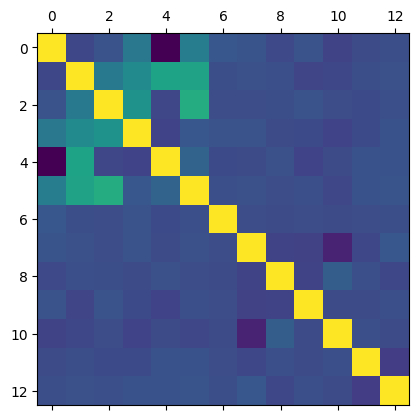

In [116]:
plt.matshow(num_df.corr())
plt.show()

In [118]:
df.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal_3.0.csv")

In [119]:
df

,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,...,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,Taux de victoire 1,Taux de victoire 2,Taux de ban 1,Taux de ban 2
0,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,Rayonnement du vide,Cotte épineuse,...,Yasuo,Senna,Nautilus,0,1,NaN,0.49328,0.49752,0.03688,0.12124
1,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,Jambières du berzerker,Lame de Doran,...,Jinx,Nautilus,Braum,1,0,NaN,0.50790,0.49018,0.04016,0.10424
2,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,Tueur de krakens,Salutations de Dominik,...,Jinx,Rakan,Nautilus,1,1,NaN,0.49738,0.49134,0.08746,0.05170
3,1,32.250000,Jinx,0.65,Grandmaster,3.43:1,Match classé Solo,NaN,Tueur de krakens,Ouragan de Runaan,...,Xayah,Rakan,Leona,0,1,NaN,0.50526,0.49450,0.07224,0.08538
4,1,23.283333,Zeri,0.42,Challenger,3.00:1,Match classé Solo,NaN,Lame dinfini,Danseur fantôme,...,Zeri,Pyke,Rell,2,0,NaN,0.49952,0.49454,0.03652,0.06782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,1,15.633333,Ekko,0.50,Master,4.50:1,Match classé Solo,NaN,Sceau noir,Dent de Nashor,...,Kai'Sa,Renata Glasc,Blitzcrank,2,2,NaN,0.49630,0.49982,0.08212,0.06038
61113,1,31.566667,Ahri,0.50,Master,4.33:1,Match classé Solo,NaN,Coiffe de Rabadon,Malfaisance,...,Aphelios,Maokai,Lulu,0,1,NaN,0.49570,0.48492,0.07860,0.02422
61114,1,33.950000,Ahri,0.63,Master,2.86:1,Match classé Solo,NaN,Sablier de Zhonya,Fléau de liche,...,Senna,Shen,Camille,1,2,NaN,0.49570,0.49264,0.05874,0.04052
61115,1,33.500000,Akshan,0.39,Master,3.50:1,Match classé Solo,NaN,Lame dinfini,Opportunité,...,Senna,Janna,Maokai,0,0,NaN,0.50194,0.49548,0.04410,0.05976


# Scraping items par champion

In [21]:
driver = webdriver.Chrome(service=service, options=chrome_options)
wait = WebDriverWait(driver, 10)
data = []
# Scrapping des données des parties passées.
for url in liste_noms:
    driver.get(url)
    accept_cookies_if_present(driver)
    click_show_more(driver, wait)
    wait_parties = WebDriverWait(driver, 10)
    while True:
        try:
            show_more_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button.more")))
            show_more_button.click()
            wait.until(EC.invisibility_of_element(show_more_button))
            wait_parties = WebDriverWait(driver, 3)
        except Exception as e:
            print("Le bouton 'Show More' n'est plus présent ou une autre exception s'est produite:", e)
        break
        
    parties = wait_parties.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".css-j7qwjs.e1155w840")))

    for index, partie in enumerate(parties, start=1):
        
        partie_data = {
            'Résultat': partie.find_element(By.CSS_SELECTOR, ".result").text,
            'Durée': partie.find_element(By.CSS_SELECTOR, ".length").text,
            'Champion': partie.find_element(By.CSS_SELECTOR, "a.champion img").get_attribute("alt"),
            'Contribution': partie.find_element(By.CSS_SELECTOR, ".p-kill").text,
            'Rang': partie.find_element(By.CSS_SELECTOR, ".avg-tier").text,
            'KDA' : partie.find_element(By.CSS_SELECTOR, ".kda").text,
            'KDA ratio' : partie.find_element(By.CSS_SELECTOR, ".kda-ratio").text,
            'Type de jeu': partie.find_element(By.CSS_SELECTOR, ".game-type").text,
            'Tags': [tag_element.text for tag_element in partie.find_elements(By.CSS_SELECTOR, ".game-tags__scroll-container div.tag")],
            'Items alt text': [img.get_attribute("alt") for img in partie.find_elements(By.CSS_SELECTOR, "dl.items > dd div.item img")],
            'Noms héros': [img.get_attribute("alt") for img in partie.find_elements(By.CSS_SELECTOR, "div.icon img")]

        }
    
        try:
            button = partie.until(EC.element_to_be_clickable((By.CLASS_NAME, "btn-detail")))
            button.click()
            print("Bouton 'btn-detail' trouvé et cliqué.")
        except TimeoutException:
            print("Le bouton 'btn-detail' n'a pas été trouvé dans le délai imparti.")
        except NoSuchElementException:
            print("Le bouton 'btn-detail' n'a pas été trouvé sur la page.")
    
        data.append(partie_data)
        print("Données de la partie", index, "collectées.")
        
driver.quit()

Le bouton 'J'ACCEPTE' n'est pas présent sur la page.
Plus de bouton 'Show More' à cliquer.
Le bouton 'Show More' n'est plus présent ou une autre exception s'est produite: Message: 
Stacktrace:
0   chromedriver                        0x00000001025b68dc chromedriver + 4368604
1   chromedriver                        0x00000001025aed70 chromedriver + 4337008
2   chromedriver                        0x00000001021d2c04 chromedriver + 289796
3   chromedriver                        0x0000000102214e00 chromedriver + 560640
4   chromedriver                        0x000000010224d5ec chromedriver + 792044
5   chromedriver                        0x0000000102209ab4 chromedriver + 514740
6   chromedriver                        0x000000010220a50c chromedriver + 517388
7   chromedriver                        0x000000010257adf8 chromedriver + 4124152
8   chromedriver                        0x000000010257fbe8 chromedriver + 4144104
9   chromedriver                        0x00000001025607c0 chromedriver + 

TimeoutException: Message: 


In [18]:
chrome_options = Options()
chrome_options.add_argument("--headless")  # Pour exécuter Chrome en mode sans tête si désiré
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# URL de la page à scraper
url = 'https://www.op.gg/summoners/euw/Kaimietis3-EUW'
driver.get(url)

try:
    # Attendre que le bouton soit cliquable
    wait = WebDriverWait(driver, 10)
    button = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, "btn-detail")))
    button.click()
    print("Bouton 'btn-detail' trouvé et cliqué.")
except TimeoutException:
    print("Le bouton 'btn-detail' n'a pas été trouvé dans le délai imparti.")
except NoSuchElementException:
    print("Le bouton 'btn-detail' n'a pas été trouvé sur la page.")
finally:
    driver.quit()


Le bouton n'a pas été trouvé dans le délai imparti.


In [24]:
chrome_options = Options()
chrome_options.add_argument("--headless")  # Pour exécuter Chrome en mode sans tête si désiré
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)
wait = WebDriverWait(driver, 10)
data = []

for url in liste_noms:
    driver.get(url)
    accept_cookies_if_present(driver)
    click_show_more(driver, wait)
    try:
        # Clique sur tous les boutons "Show More"
        while True:
            show_more_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button.more")))
            show_more_button.click()
            wait.until(EC.invisibility_of_element(show_more_button))
    except TimeoutException:
        print("Plus aucun bouton 'Show More' à cliquer.")

    def find_elements_with_retry(selector, retries=5):
        for _ in range(retries):
            try:
                return wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, selector)))
            except TimeoutException:
                print(f"Tentative de trouver les éléments échouée, réessai...")
                time.sleep(2)  # Petite pause avant de réessayer
        raise TimeoutException(f"Éléments non trouvés après {retries} tentatives.")

    parties = find_elements_with_retry(".css-j7qwjs.e1155w840")

    for index, partie in enumerate(parties, start=1):
        partie_data = {
            'Résultat': partie.find_element(By.CSS_SELECTOR, ".result").text,
            # Autres champs
        }
        
        try:
            # Attente et clic sur le bouton de détail dans chaque partie
            detail_button = WebDriverWait(partie, 10).until(EC.element_to_be_clickable((By.CLASS_NAME, "btn-detail")))
            detail_button.click()
            print("Bouton 'btn-detail' trouvé et cliqué.")
        except TimeoutException:
            print("Le bouton 'btn-detail' n'a pas été trouvé dans le délai imparti.")
        except NoSuchElementException:
            print("Le bouton 'btn-detail' n'a pas été trouvé sur la page.")

        data.append(partie_data)
        print("Données de la partie", index, "collectées.")
        
driver.quit()


Le bouton 'J'ACCEPTE' n'est pas présent sur la page.
Plus de bouton 'Show More' à cliquer.
Plus aucun bouton 'Show More' à cliquer.
Tentative de trouver les éléments échouée, réessai...
Tentative de trouver les éléments échouée, réessai...
Tentative de trouver les éléments échouée, réessai...
Tentative de trouver les éléments échouée, réessai...
Tentative de trouver les éléments échouée, réessai...


TimeoutException: Message: Éléments non trouvés après 5 tentatives.


In [1]:
df

NameError: name 'df' is not defined

In [6]:
df = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal_3.0.csv")
df = df.loc[:, ~df.columns.str.contains('Unnamed')]
df

/var/folders/9j/z6dwrprd2ms5k5pwnps_c39c0000gn/T/ipykernel_43708/2250605225.py:1: DtypeWarning: Columns (8,34) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/LOL_Principal_3.0.csv")


,Résultat,Durée,Champion,Contribution,Rang,KDA ratio,Type de jeu,Tags,Item 1,Item 2,...,Équipe 2 Champion 4,Équipe 1 Champion 5,Équipe 2 Champion 5,Fort,Faible,Item 8,Taux de victoire 1,Taux de victoire 2,Taux de ban 1,Taux de ban 2
0,1,30.583333,Tahm Kench,0.62,Grandmaster,6.00:1,Match classé Solo,NaN,Rayonnement du vide,Cotte épineuse,...,Yasuo,Senna,Nautilus,0,1,NaN,0.49328,0.49752,0.03688,0.12124
1,1,21.983333,Jinx,0.50,Challenger,11.00:1,Match classé Solo,NaN,Jambières du berzerker,Lame de Doran,...,Jinx,Nautilus,Braum,1,0,NaN,0.50790,0.49018,0.04016,0.10424
2,0,25.633333,Jinx,0.47,Grandmaster,1.29:1,Match classé Solo,NaN,Tueur de krakens,Salutations de Dominik,...,Jinx,Rakan,Nautilus,1,1,NaN,0.49738,0.49134,0.08746,0.05170
3,1,32.250000,Jinx,0.65,Grandmaster,3.43:1,Match classé Solo,NaN,Tueur de krakens,Ouragan de Runaan,...,Xayah,Rakan,Leona,0,1,NaN,0.50526,0.49450,0.07224,0.08538
4,1,23.283333,Zeri,0.42,Challenger,3.00:1,Match classé Solo,NaN,Lame dinfini,Danseur fantôme,...,Zeri,Pyke,Rell,2,0,NaN,0.49952,0.49454,0.03652,0.06782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,1,15.633333,Ekko,0.50,Master,4.50:1,Match classé Solo,NaN,Sceau noir,Dent de Nashor,...,Kai'Sa,Renata Glasc,Blitzcrank,2,2,NaN,0.49630,0.49982,0.08212,0.06038
61113,1,31.566667,Ahri,0.50,Master,4.33:1,Match classé Solo,NaN,Coiffe de Rabadon,Malfaisance,...,Aphelios,Maokai,Lulu,0,1,NaN,0.49570,0.48492,0.07860,0.02422
61114,1,33.950000,Ahri,0.63,Master,2.86:1,Match classé Solo,NaN,Sablier de Zhonya,Fléau de liche,...,Senna,Shen,Camille,1,2,NaN,0.49570,0.49264,0.05874,0.04052
61115,1,33.500000,Akshan,0.39,Master,3.50:1,Match classé Solo,NaN,Lame dinfini,Opportunité,...,Senna,Janna,Maokai,0,0,NaN,0.50194,0.49548,0.04410,0.05976


# Création de métriques

In [154]:
champions_challenger = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/champions_challenger.csv")
champions_grmaster = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/champions_grmaster.csv")
champions_master = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/champions_master.csv")
champions = pd.read_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/champions.csv")
champions = champions.loc[:, ~champions.columns.str.contains('Unnamed')]
champions_master = champions_master.loc[:, ~champions_master.columns.str.contains('Unnamed')]
champions_grmaster = champions_grmaster.loc[:, ~champions_grmaster.columns.str.contains('Unnamed')]
champions_challenger = champions_challenger.loc[:, ~champions_challenger.columns.str.contains('Unnamed')]


champions['Ratio de victoire'] = champions['Ratio de victoire'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)
champions['Taux de pick par match'] = champions['Taux de pick par match'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)
champions['Ratio de ban par match'] = champions['Ratio de ban par match'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)

champions_master['Ratio de victoire'] = champions_master['Ratio de victoire'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)
champions_master['Taux de pick par match'] = champions_master['Taux de pick par match'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)
champions_master['Ratio de ban par match'] = champions_master['Ratio de ban par match'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)

champions_grmaster['Ratio de victoire'] = champions_grmaster['Ratio de victoire'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)
champions_grmaster['Taux de pick par match'] = champions_grmaster['Taux de pick par match'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)
champions_grmaster['Ratio de ban par match'] = champions_grmaster['Ratio de ban par match'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)

champions_challenger['Ratio de victoire'] = champions_challenger['Ratio de victoire'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)
champions_challenger['Taux de pick par match'] = champions_challenger['Taux de pick par match'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)
champions_challenger['Ratio de ban par match'] = champions_challenger['Ratio de ban par match'].str.extract(r'(\d+)').astype(int).apply(lambda x: x/100)

In [156]:
champions_master = champions_master.sort_values("Champion")
champions_grmaster = champions_grmaster.sort_values("Champion")
champions_challenger = champions_challenger.sort_values("Champion")

In [157]:
print(list(champions_master["Champion"])==list(champions_grmaster["Champion"]))
print(list(champions_master["Champion"])==list(champions_challenger["Champion"]))
print(list(champions_grmaster["Champion"])==list(champions_challenger["Champion"]))

True
True
True


In [158]:
champions_challenger["Parties jouées"] = champions_challenger["Parties jouées"].apply(lambda x: x.replace('\u202f', '')).astype(int)
champions_master["Parties jouées"] = champions_master["Parties jouées"].apply(lambda x: x.replace('\u202f', '')).astype(int)
champions_grmaster["Parties jouées"] = champions_grmaster["Parties jouées"].apply(lambda x: x.replace('\u202f', '')).astype(int)

In [159]:
dictio = {}

valeurs_m = [i for i in champions_master["Parties jouées"]]
valeurs_c = [i for i in champions_challenger["Parties jouées"]]
valeurs_g = [i for i in champions_grmaster["Parties jouées"]]
valeurs=[0]*167
for i in range(0,len(valeurs_g)):
    valeurs[i]=valeurs_m[i]+valeurs_g[i]+valeurs_c[i]

In [160]:
champions_master.tail(2)

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or
133,134,Zoé,3094,2.72:1,0.51,0.02,0.0,153.67,"10,973"
119,120,Zyra,3659,2.3:1,0.49,0.02,0.0,67.08,"9,081"


In [161]:
champions_grmaster.tail(2)

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or
148,149,Zoé,70,2.61:1,0.47,0.0,0.0,166.2,"11,071"
154,155,Zyra,59,2.61:1,0.47,0.0,0.0,118.8,"9,809"


In [162]:
champions_challenger.tail(2)

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or
145,146,Zoé,10,1.82:1,0.40,0.00,0.0,166.4,"10,267"
128,129,Zyra,26,2.59:1,0.38,0.01,0.0,161.0,"11,317"


In [163]:
valeurs_master=[0]*167
for i in range(0,len(valeurs_g)):
    valeurs_master[i]=round(valeurs_m[i]/valeurs[i],3)

In [164]:
valeurs_grmaster=[0]*167
for i in range(0,len(valeurs_g)):
    valeurs_grmaster[i]=round(valeurs_g[i]/valeurs[i],3)

In [165]:
valeurs_challenger=[0]*167
for i in range(0,len(valeurs_g)):
    valeurs_challenger[i]=round(valeurs_c[i]/valeurs[i],3)

In [166]:
champions_challenger["Ratio_challenger"]=valeurs_challenger
champions_grmaster["Ratio_grmaster"]=valeurs_grmaster
champions_master["Ratio_master"]=valeurs_master


In [167]:
print(valeurs_g == valeurs_c)
print(valeurs_g == valeurs_m)
print(valeurs_c == valeurs_m)

False
False
False


In [195]:
verification =[0]*167
for i in range(0,len(champions_challenger)):
    verification[i]=valeurs_master[i]+valeurs_grmaster[i]+valeurs_challenger[i]
verification

[1.0,
 0.999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.001,
 1.0,
 0.9990000000000001,
 1.0,
 1.0010000000000001,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.001,
 1.0,
 1.001,
 1.0010000000000001,
 1.0,
 1.0010000000000001,
 0.999,
 1.0,
 1.0,
 1.0,
 1.001,
 1.001,
 0.999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.001,
 1.0,
 1.0010000000000001,
 0.999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.001,
 1.0,
 1.001,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.001,
 1.0,
 1.0,
 1.001,
 1.0,
 1.0,
 0.9990000000000001,
 1.0,
 0.999,
 1.0,
 1.0,
 1.0,
 0.999,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999,
 1.0,
 1.001,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.001,
 1.0,
 1.001,
 1.0,
 1.0,
 1.0,
 1.0,
 0.999,
 1.0,
 0.9990000000000001,
 1.0,
 1.001,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9990000000000001,
 1.0,
 0.999,
 1.0,
 1.0,
 1.0,
 1.0010000000000001,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.00

In [169]:
champions_master["KDA"]=champions_master["KDA"].apply(lambda x: x[:4]if len(x)==6 else x[:3] if len(x)==5 else x[:2] if len(x)==4 else x[:1]if len(x)==3 else x[0]).astype(float)
champions_challenger["KDA"]=champions_challenger["KDA"].apply(lambda x: x[:4]if len(x)==6 else x[:3] if len(x)==5 else x[:2] if len(x)==4 else x[:1]if len(x)==3 else x[0]).astype(float)
champions_grmaster["KDA"]=champions_grmaster["KDA"].apply(lambda x: x[:4]if len(x)==6 else x[:3] if len(x)==5 else x[:2] if len(x)==4 else x[:1]if len(x)==3 else x[0]).astype(float)

In [170]:
champions_master["Or"]=champions_master["Or"].apply(lambda x: x.replace(",",".")).astype(float)
champions_grmaster["Or"]=champions_grmaster["Or"].apply(lambda x: x.replace(",",".")).astype(float)
champions_challenger["Or"]=champions_challenger["Or"].astype(str).apply(lambda x: x.replace(",",".")).astype(float)

In [171]:
colonnes =["KDA","Ratio de victoire","Taux de pick par match","Ratio de ban par match","CS","Or"]
new_master=champions_master.copy()
new_grmaster=champions_grmaster.copy()
new_challenger=champions_challenger.copy()


for i in colonnes:
    new_master[i]=champions_master[i]*champions_master["Ratio_master"]
    new_challenger[i]=champions_challenger[i]*champions_challenger["Ratio_challenger"]
    new_grmaster[i]=champions_grmaster[i]*champions_grmaster["Ratio_grmaster"]


In [172]:
new_grmaster.head(1)

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or,Ratio_grmaster
12,13,Aatrox,1102,0.1246,0.0329,0.0098,0.0056,13.1327,0.75726,0.07


In [173]:
new_master.head(1)

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or,Ratio_master
17,18,Aatrox,14277,1.61624,0.44492,0.09988,0.0908,166.81776,9.925348,0.908


In [174]:
new_challenger.head(1)

,0,Champion,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or,Ratio_challenger
21,22,Aatrox,348,0.04004,0.00968,0.00286,0.0011,4.2856,0.241824,0.022


In [176]:
colonnes = ["Parties jouées","KDA", "Ratio de victoire", "Taux de pick par match", "Ratio de ban par match", "CS", "Or"]

In [177]:
new = pd.DataFrame()
new[[colonnes]]=""
new["Champion"] = new_master['Champion'] 


In [178]:
new



,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or,Champion
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aatrox
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ahri
31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akali
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Akshan
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alistar
...,...,...,...,...,...,...,...,...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zeri
159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ziggs
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zilean
133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Zoé


In [180]:
list(new_master["KDA"])

[1.6162400000000001,
 2.67565,
 2.1714,
 2.23965,
 2.3750299999999998,
 2.19655,
 2.4936499999999997,
 2.11276,
 1.9546400000000002,
 2.2452300000000003,
 2.358,
 1.7992000000000001,
 3.0048,
 2.4154,
 2.51246,
 2.2159500000000003,
 2.83911,
 2.00788,
 2.1923999999999997,
 1.78911,
 1.782,
 2.04881,
 2.0838,
 1.74248,
 2.09925,
 1.7714400000000001,
 1.9880600000000002,
 2.3410800000000003,
 2.58718,
 2.93105,
 2.19069,
 2.4414499999999997,
 1.4020899999999998,
 2.4353000000000002,
 2.7666,
 1.9456799999999996,
 1.96112,
 1.7934899999999998,
 2.2008,
 2.32677,
 1.76305,
 2.7186,
 1.9313200000000001,
 2.35204,
 1.2987600000000001,
 1.5892799999999998,
 3.7689600000000003,
 3.3415199999999996,
 3.1054500000000003,
 1.6412399999999998,
 1.6777,
 2.88192,
 2.25582,
 1.89104,
 2.36728,
 2.0257,
 2.4157999999999995,
 2.27263,
 2.3436,
 2.43639,
 1.8602999999999998,
 2.2872,
 1.95312,
 2.629,
 2.13108,
 2.0048999999999997,
 2.1631,
 2.7353700000000005,
 2.49705,
 2.3995599999999997,
 2.7769199

In [190]:
for col in colonnes:
    grandm = list(new_grmaster[col].astype(float))
    challenger = list(new_challenger[col].astype(float))
    master = list(new_master[col].astype(float))
    element = [m + g + c for m, g, c in zip(grandm, challenger, master)]
    new[col]= element



In [202]:
new["Ratio_master"]=valeurs_master
new["Ratio_challenger"]=valeurs_challenger
new["Ratio_grmaster"]=valeurs_grmaster

In [204]:
new.sample()

,Parties jouées,KDA,Ratio de victoire,Taux de pick par match,Ratio de ban par match,CS,Or,Champion,Ratio_master,Ratio_challenger,Ratio_grmaster
164,1360.0,2.18063,0.48099,0.00988,0.0,202.4609,11.099706,Malzahar,0.988,0.003,0.009


In [205]:
new.to_csv("/Users/elisajh/Desktop/AS/B2/Data/Projet LOL/champions_caractéristiques.csv")